# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set Units
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | gaspe
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | okhotsk
Processing Record 6 of Set 1 | lascano
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | palestine
Processing Record 9 of Set 1 | tvoroyri
Processing Record 10 of Set 1 | nabire
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | hirara
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | mechraa bel ksiri
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | kamaishi
Processing Record 19 of Set 1 | eunice
Processing Record 20 of Set 1 | castillos
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 

Processing Record 36 of Set 4 | rosso
Processing Record 37 of Set 4 | sao domingos do maranhao
Processing Record 38 of Set 4 | lensk
Processing Record 39 of Set 4 | vadso
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | belmonte
Processing Record 42 of Set 4 | harnai
Processing Record 43 of Set 4 | waitara
Processing Record 44 of Set 4 | clorinda
Processing Record 45 of Set 4 | ntossoni
City not found. Skipping...
Processing Record 46 of Set 4 | saksaul'skiy
City not found. Skipping...
Processing Record 47 of Set 4 | anna regina
Processing Record 48 of Set 4 | jacobina
Processing Record 49 of Set 4 | mao
Processing Record 0 of Set 5 | manacapuru
Processing Record 1 of Set 5 | masindi port
Processing Record 2 of Set 5 | westport
Processing Record 3 of Set 5 | maxixe
Processing Record 4 of Set 5 | koulamoutou
Processing Record 5 of Set 5 | ahau
City not found. Skipping...
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | san ignacio
Processing Record

Processing Record 32 of Set 8 | sorong
Processing Record 33 of Set 8 | palikir - national government center
Processing Record 34 of Set 8 | khash
Processing Record 35 of Set 8 | howrah
Processing Record 36 of Set 8 | klyuchi
Processing Record 37 of Set 8 | mount pearl
Processing Record 38 of Set 8 | antsiranana
Processing Record 39 of Set 8 | laojunmiao
Processing Record 40 of Set 8 | tanjung selor
City not found. Skipping...
Processing Record 41 of Set 8 | nova xavantina
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | wotho
Processing Record 46 of Set 8 | sao felix do xingu
Processing Record 47 of Set 8 | tambura
Processing Record 48 of Set 8 | coahuayana de hidalgo
Processing Record 49 of Set 8 | port douglas
Processing Record 0 of Set 9 | okahandja
Processing Record 1 of Set 9 | palangkaraya
Processing Record 2 of Set 9 | calama
Proc

Processing Record 24 of Set 12 | recani
Processing Record 25 of Set 12 | cabeza del buey
Processing Record 26 of Set 12 | betio village
Processing Record 27 of Set 12 | kwang binh
Processing Record 28 of Set 12 | santo antonio do ica
Processing Record 29 of Set 12 | lankaran
Processing Record 30 of Set 12 | kikwit
Processing Record 31 of Set 12 | chegdomyn
Processing Record 32 of Set 12 | timmins
Processing Record 33 of Set 12 | coronel suarez
Processing Record 34 of Set 12 | hanover
Processing Record 35 of Set 12 | phan thiet
Processing Record 36 of Set 12 | recreo
Processing Record 37 of Set 12 | zeya
Processing Record 38 of Set 12 | bamboo flat
Processing Record 39 of Set 12 | santa cruz
Processing Record 40 of Set 12 | chicoana
Processing Record 41 of Set 12 | hayma'
City not found. Skipping...
Processing Record 42 of Set 12 | kailua-kona
Processing Record 43 of Set 12 | zavodskoy
Processing Record 44 of Set 12 | masuguru
Processing Record 45 of Set 12 | eldorado at santa fe
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,11.47,78,40,1.54,US,1682994592
1,gaspe,48.8334,-64.4819,3.95,100,100,6.17,CA,1682994592
2,kruisfontein,-34.0033,24.7314,11.05,93,100,3.06,ZA,1682994592
3,okhotsk,59.3833,143.3000,1.34,70,89,3.31,RU,1682994592
4,lascano,-33.6667,-54.2000,12.21,68,97,0.89,UY,1682994593


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,11.47,78,40,1.54,US,1682994592
1,gaspe,48.8334,-64.4819,3.95,100,100,6.17,CA,1682994592
2,kruisfontein,-34.0033,24.7314,11.05,93,100,3.06,ZA,1682994592
3,okhotsk,59.3833,143.3000,1.34,70,89,3.31,RU,1682994592
4,lascano,-33.6667,-54.2000,12.21,68,97,0.89,UY,1682994593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

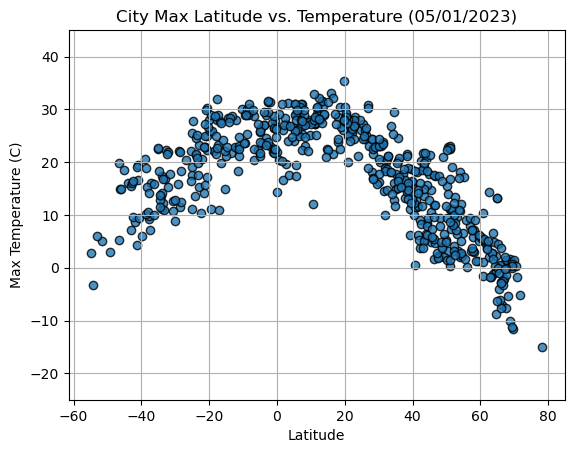

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha =.8, edgecolors="k",)

# Incorporate the other graph properties
time_func = time.localtime()
time_string = time.strftime("%m/%d/%Y",time_func)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({time_string})")
plt.grid(True)
plt.ylim(-25,45)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

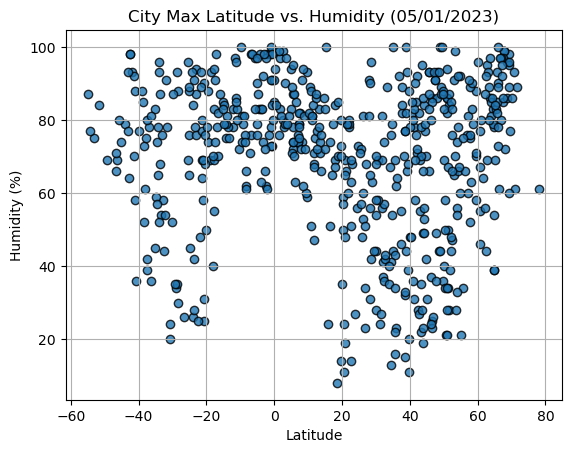

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha =.8, edgecolors="k",)

# Incorporate the other graph properties
time_func = time.localtime()
time_string = time.strftime("%m/%d/%Y",time_func)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Max Latitude vs. Humidity ({time_string})")
plt.grid(True)
#plt.ylim(0,110)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

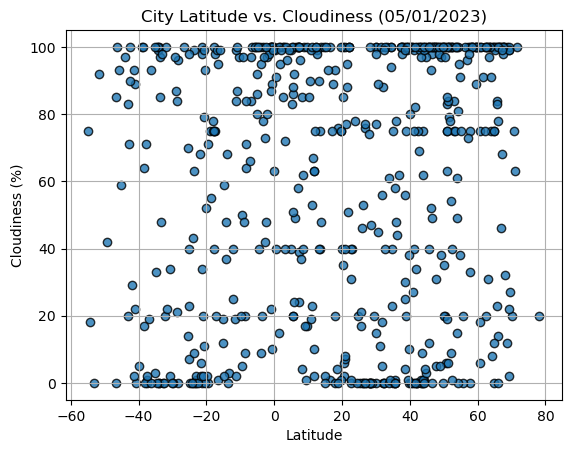

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha =.8, edgecolors="k",)

# Incorporate the other graph properties
time_func = time.localtime()
time_string = time.strftime("%m/%d/%Y",time_func)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({time_string})")
plt.grid(True)
plt.ylim(-5,105)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

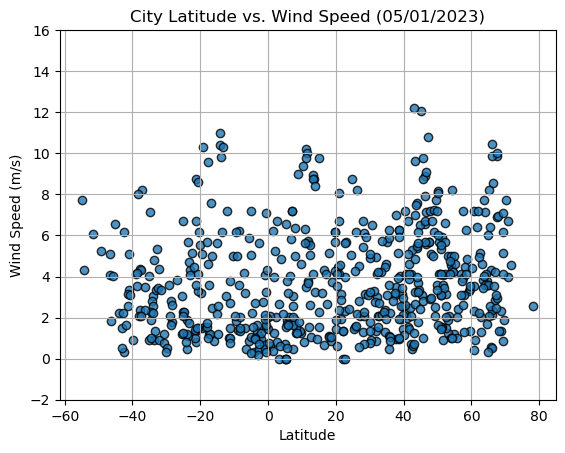

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha =.8, edgecolors="k",)

# Incorporate the other graph properties
time_func = time.localtime()
time_string = time.strftime("%m/%d/%Y",time_func)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({time_string})")
plt.grid(True)
plt.ylim(-2,16)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regress_values = x_val * slope + intercept
#slope = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,11.47,78,40,1.54,US,1682994592
1,gaspe,48.8334,-64.4819,3.95,100,100,6.17,CA,1682994592
3,okhotsk,59.3833,143.3000,1.34,70,89,3.31,RU,1682994592
6,palestine,31.9216,35.2033,9.97,81,5,0.86,PS,1682994593
7,tvoroyri,61.5556,-6.8111,4.47,64,91,6.43,FO,1682994593


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <= 0, :]
# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kruisfontein,-34.0033,24.7314,11.05,93,100,3.06,ZA,1682994592
4,lascano,-33.6667,-54.2000,12.21,68,97,0.89,UY,1682994593
5,puerto natales,-51.7236,-72.4875,5.03,84,92,6.05,CL,1682994593
8,nabire,-3.3667,135.4833,28.96,74,78,1.35,ID,1682994593
9,mount isa,-20.7333,139.5000,24.87,25,11,4.12,AU,1682994593


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8654917326020629

Discussion about linear relationship:
The regression indicates a strong negative correlation, meaning that when one variable increases, the other variable decreases
In this case, the further you move from the equator, the temperature decreases.


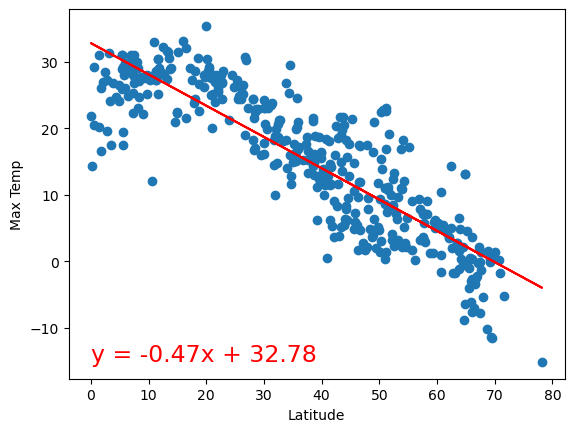

In [15]:
# Linear regression on Northern Hemisphere
x_val = northern_hemisphere_df["Lat"]
y_val = northern_hemisphere_df["Max Temp"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(0,-15),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a strong negative correlation, meaning that when one variable increases, the other variable decreases")
print("In this case, the further you move from the equator, the temperature decreases.")


The r-value is 0.7554611144987544

Discussion about linear relationship:
The regression indicates a indicates a strong positive correlation, meaning that when one variable increases, the other variable increases
In this case, the closer you to the equator, the temperature increases.


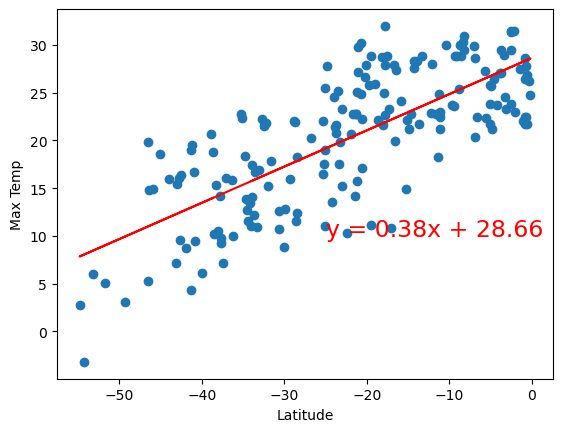

In [16]:
# Linear regression on Southern Hemisphere
x_val = southern_hemisphere_df["Lat"]
y_val = southern_hemisphere_df["Max Temp"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(-25,10),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print()
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a indicates a strong positive correlation, meaning that when one variable increases, the other variable increases")
print("In this case, the closer you to the equator, the temperature increases.")

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.014951361508617804

Discussion about linear relationship:
The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables


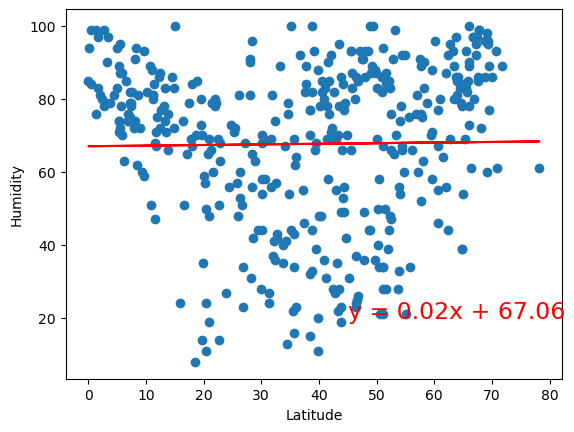

In [17]:
# Northern Hemisphere
x_val = northern_hemisphere_df["Lat"]
y_val = northern_hemisphere_df["Humidity"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(45, 20),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables")


The r-value is 0.25209301416309354

Discussion about linear relationship:
The regression indicates a weak positive correlation, there is a probable correlation between these two variables.


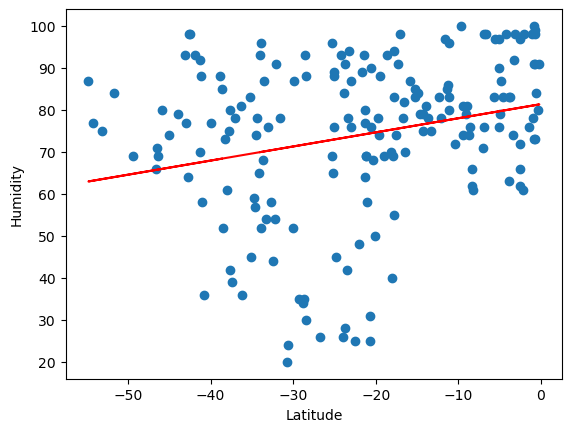

In [30]:
# Southern Hemisphere
x_val = southern_hemisphere_df["Lat"]
y_val = southern_hemisphere_df["Humidity"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(10,45),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a weak positive correlation, there is a probable correlation between these two variables.")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.08886740546163889

Discussion about linear relationship:
The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables


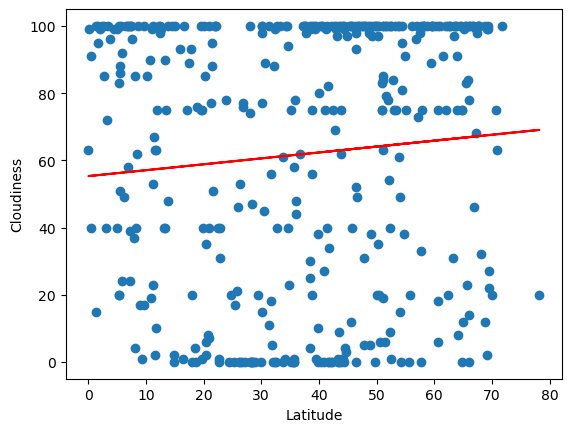

In [19]:
# Linear regression on Northern Hemisphere
x_val = northern_hemisphere_df["Lat"]
y_val = northern_hemisphere_df["Cloudiness"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(10,-15),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables")

The r-value is 0.2191758969061033

Discussion about linear relationship:
The regression indicates a weak positive correlation, there is a probable correlation between these two variables.


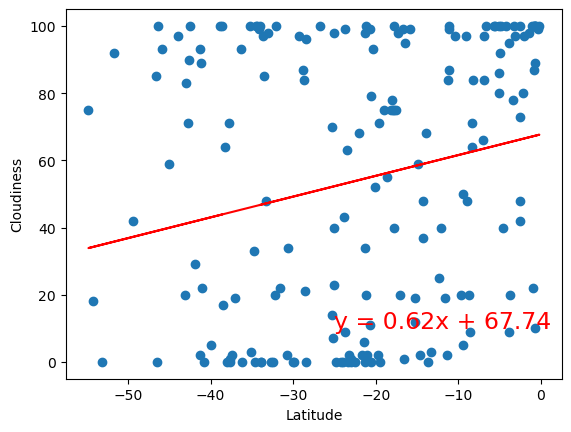

In [31]:
# Southern Hemisphere
x_val = southern_hemisphere_df["Lat"]
y_val = southern_hemisphere_df["Cloudiness"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(-25,10),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a weak positive correlation, there is a probable correlation between these two variables.")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.08886740546163889

Discussion about linear relationship:
The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables


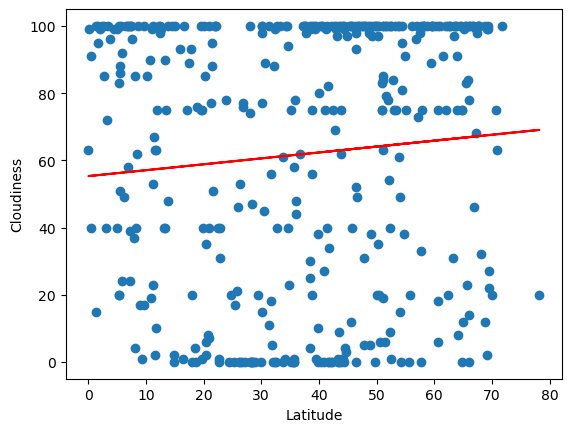

In [26]:
# Linear regression on Northern Hemisphere
x_val = northern_hemisphere_df["Lat"]
y_val = northern_hemisphere_df["Cloudiness"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(10,-25),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables")

The r-value is -0.1740123129459307

Discussion about linear relationship:
The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables


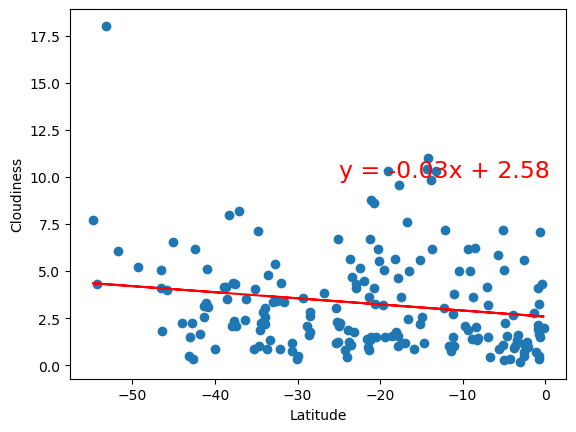

In [23]:
# Southern Hemisphere
x_val = southern_hemisphere_df["Lat"]
y_val = southern_hemisphere_df["Wind Speed"]
slope = linregress(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_val, "-r")
plt.annotate(line_eq,(-25,10),fontsize=17,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print()
print("Discussion about linear relationship:")
print("The regression indicates a weak correlation, meaning that there is no clear relationship between the two variables")